<a href="https://colab.research.google.com/github/bezawitalemyimer/10xAc/blob/main/week1/notebooks/data_source_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1 - User Overview analysis

In [68]:
#imports 
import pandas as pd      # data manipulation transformation 
import numpy as np       # numerical data analysis 
import matplotlib.pyplot as plt
import seaborn as sns    # data visualization
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #higher resolution
# importing the style package
from matplotlib import style
# using the style for the plot
plt.style.use('ggplot')



In [69]:
import warnings
warnings.filterwarnings('ignore')
path ="/content/drive/MyDrive/week 1 colab /Week1_challenge_data_source.csv"
data = pd.read_csv(path)
 #data set is load and stored in pandas data frame
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [70]:
data.describe

<bound method NDFrame.describe of            Bearer Id            Start  ...  Total UL (Bytes) Total DL (Bytes)
0       1.311448e+19   4/4/2019 12:01  ...        36749741.0      308879636.0
1       1.311448e+19   4/9/2019 13:04  ...        53800391.0      653384965.0
2       1.311448e+19   4/9/2019 17:42  ...        27883638.0      279807335.0
3       1.311448e+19   4/10/2019 0:31  ...        43324218.0      846028530.0
4       1.311448e+19  4/12/2019 20:10  ...        38542814.0      569138589.0
...              ...              ...  ...               ...              ...
149996  7.277826e+18   4/29/2019 7:28  ...        57628851.0      574175259.0
149997  7.349883e+18   4/29/2019 7:28  ...        39135081.0      666648844.0
149998  1.311448e+19   4/29/2019 7:28  ...        34912224.0      592786405.0
149999  1.311448e+19   4/29/2019 7:28  ...        29626096.0      371895920.0
150000           NaN              NaN  ...               NaN              NaN

[150001 rows x 55 columns]>

Explore what has been stored in it. The column names, how many data points, number of colum, data shape

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [72]:
# column names
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [73]:
# number of data points (row ,column)
data.shape 

(150001, 55)

In [74]:
#data types
data.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

Handling Missing Values

In [75]:
# missing values in the dataset?
def percent_missing(dm):

    # Calculate total number of cells in dataframe
    totalCells = np.product(dm.shape)

    # Count number of missing values per column
    missingCount = dm.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The telecom dataset contains 12.5 % missing values.


In [76]:
#column(s) has missing values 
data.isna().sum().sort_values(ascending=False) #columns in descending order to see columns with highest missing values


Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [77]:
len(data) #length of the data frame

150001

In [78]:
data.isna().sum().sort_values(ascending=False)/len(data)*100 #to get % of missing values in each column descending method
#print(type(data))

Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol UL < 37500B      74.561503
Nb of sec with 125000B < Vol DL             65.024900
TCP UL Retrans. Vol (Bytes)                 64.432237
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 6250B < Vol DL < 31250B      58.877607
TCP DL Retrans. Vol (Bytes)                 58.763608
HTTP UL (Bytes)                             54.539636
HTTP DL (Bytes)                             54.315638
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Last Location Name                           0.768662
MSISDN/Number                                0.710662
Bearer Id                                    0.660662
Nb of sec with Vol UL < 1250B                0.528663
UL TP < 10 Kbps (%)                          0.527996
10 Kbps < UL TP < 50 Kbps (%)                0.527996
50 Kbps < UL TP < 300 Kbps (

How to fix missing values

In [79]:
# drop columns with more than 30% missing values
perc = 30.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
mod_df = data.dropna( axis=1, thresh=min_count)

#print modified data

mod_df.isna().sum().sort_values(ascending=False)/len(data)*100 
#print(min_count)
#print(data.shape, mod_df.shape)

#print( type (mod_df)) 

Avg RTT DL (ms)                   18.552543
Avg RTT UL (ms)                   18.541210
Last Location Name                 0.768662
MSISDN/Number                      0.710662
Bearer Id                          0.660662
Nb of sec with Vol UL < 1250B      0.528663
50 Kbps < UL TP < 300 Kbps (%)     0.527996
UL TP > 300 Kbps (%)               0.527996
UL TP < 10 Kbps (%)                0.527996
10 Kbps < UL TP < 50 Kbps (%)      0.527996
Nb of sec with Vol DL < 6250B      0.503330
DL TP < 50 Kbps (%)                0.502663
50 Kbps < DL TP < 250 Kbps (%)     0.502663
250 Kbps < DL TP < 1 Mbps (%)      0.502663
DL TP > 1 Mbps (%)                 0.502663
IMEI                               0.381331
Handset Type                       0.381331
Handset Manufacturer               0.381331
IMSI                               0.379997
Dur. (ms)                          0.000667
End ms                             0.000667
Avg Bearer TP UL (kbps)            0.000667
End                             

In [82]:

# cleaning data frame
mod_df.dropna(subset = ["Bearer Id", "MSISDN/Number"], inplace=True)
cols=['Avg RTT DL (ms)','Avg RTT UL (ms)','Last Location Name','10 Kbps < UL TP < 50 Kbps (%)','Nb of sec with Vol UL < 1250B','50 Kbps < UL TP < 300 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','UL TP < 10 Kbps (%)',
      'UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','DL TP > 1 Mbps (%)','250 Kbps < DL TP < 1 Mbps (%)','50 Kbps < DL TP < 250 Kbps (%)','DL TP < 50 Kbps (%)']
for col in cols:
  mod_df[col]=mod_df[col].fillna(method='ffill')

mod_df.isna().sum().sort_values(ascending=False)/len(data)*100

#data.isna().sum().sort_values(ascending=False)/len(data)*100
#print (type(data))


Total DL (Bytes)                  0.0
UL TP > 300 Kbps (%)              0.0
10 Kbps < UL TP < 50 Kbps (%)     0.0
UL TP < 10 Kbps (%)               0.0
DL TP > 1 Mbps (%)                0.0
250 Kbps < DL TP < 1 Mbps (%)     0.0
50 Kbps < DL TP < 250 Kbps (%)    0.0
DL TP < 50 Kbps (%)               0.0
Avg Bearer TP UL (kbps)           0.0
Avg Bearer TP DL (kbps)           0.0
Avg RTT UL (ms)                   0.0
Avg RTT DL (ms)                   0.0
Last Location Name                0.0
IMEI                              0.0
MSISDN/Number                     0.0
IMSI                              0.0
Dur. (ms)                         0.0
End ms                            0.0
End                               0.0
Start ms                          0.0
Start                             0.0
50 Kbps < UL TP < 300 Kbps (%)    0.0
Activity Duration DL (ms)         0.0
Total UL (Bytes)                  0.0
Activity Duration UL (ms)         0.0
Other UL (Bytes)                  0.0
Other DL (By

Transforming Data
Scaling and Normalization

In [46]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
333,34.244643
1316,118.038762
1689,163.450412
915,97.833721
1062,138.804425


In [83]:
original_data[0].min(), original_data[0].max()

(0.010094773553856842, 1808.9369176886662)

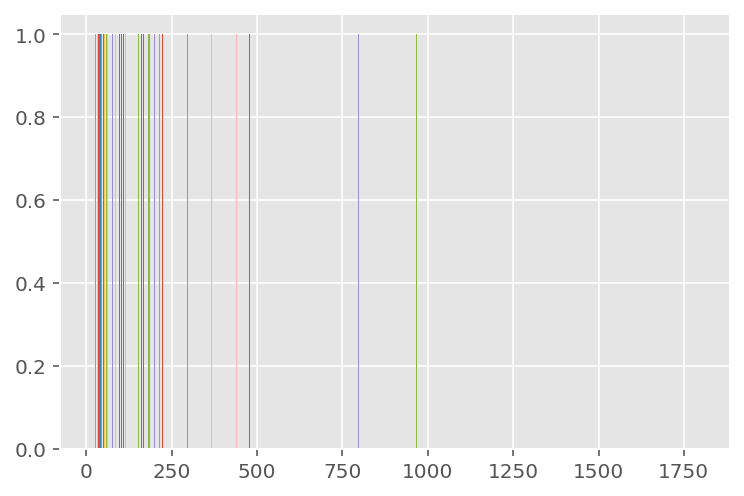

In [84]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

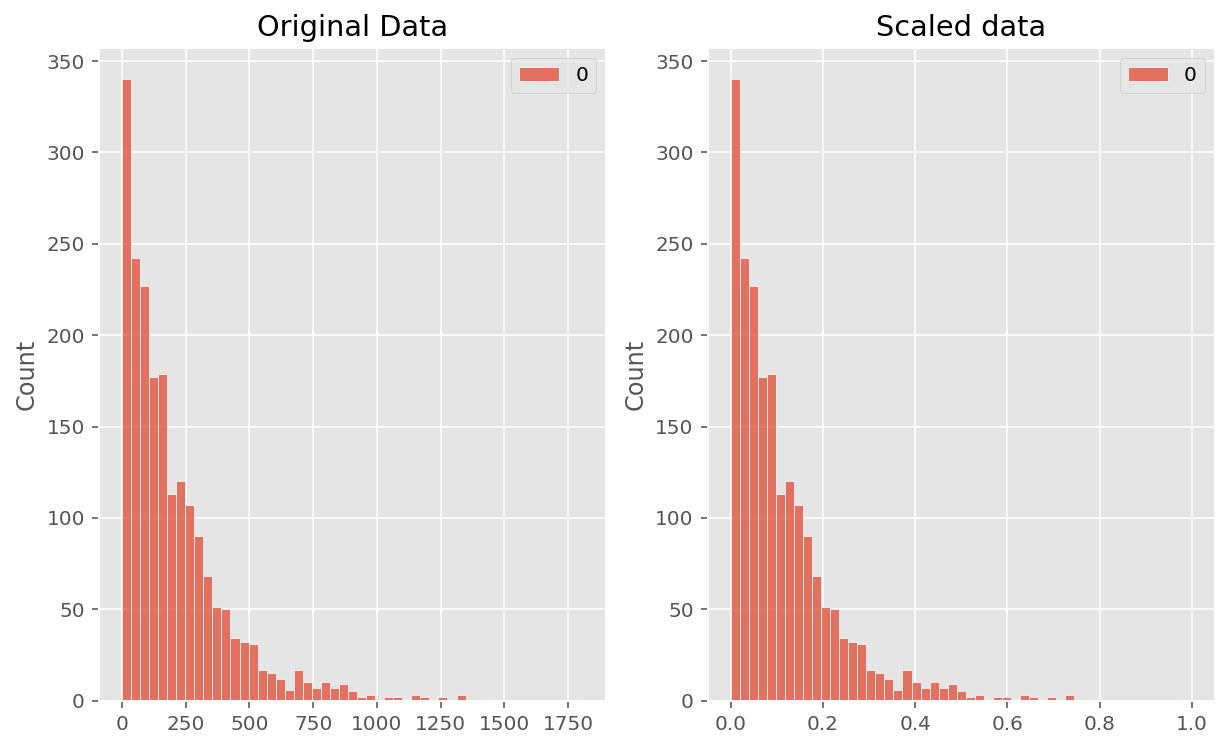

In [85]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

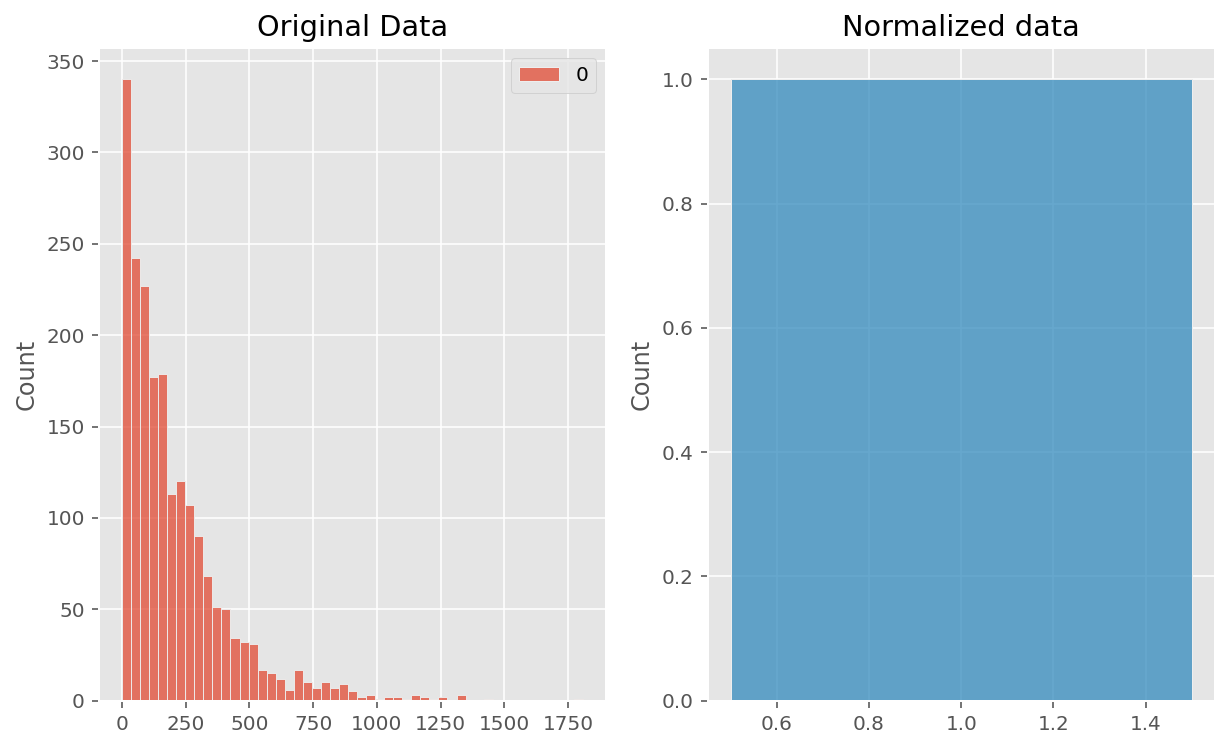

In [86]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis &
the following sub-tasks are your guidance:   
● Start by identifying the top 10 handsets used by the customers.   
● Then, identify the top 3 handset manufacturers  
● Next, identify the top 5 handsets per top 3 handset manufacturer   
● Make a short interpretation and recommendation to marketing teams


In [88]:
#Start by identifying the top 10 handsets used by the customers.
data["Handset Type"].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [91]:
#identify the top 3 handset manufacturers
data["Handset Manufacturer"].value_counts().head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [92]:
#identify the top 5 handsets per top 3 handset manufacturer
apple_handsets = data[data["Handset Manufacturer"] == "Apple"]
apple_handsets["Handset Type"].value_counts().head(5)

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [93]:
apple_handsets = data[data["Handset Manufacturer"] == "Samsung"]
apple_handsets["Handset Type"].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [94]:
apple_handsets = data[data["Handset Manufacturer"] == "Huawei"]
apple_handsets["Handset Type"].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [ ]:
#● Make a short interpretation and recommendation to marketing teams


*  The marketing team needs to focus on users with handsets from these top three manufacturers: Apple, Samsung and Huawei.

Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.     
● Aggregate per user the following information in the column     
○ number of xDR sessions     
○ Session duration      
○ the total download (DL) and upload (UL) data     
○ the total data volume (in Bytes) during this session for each application 



In [98]:
sessions = data[["MSISDN/Number","Bearer Id"]]
session_count = sessions.groupby(["MSISDN/Number"]).count()
session_count

,Bearer Id
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


In [97]:
session_count.describe()

,Bearer Id
count,106856.000000
mean,1.389777
std,0.809863
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


In [99]:
data_usage = data[["MSISDN/Number","Dur. (ms).1", "Total DL (Bytes)", "Total UL (Bytes)"]]
data_usage.groupby(["MSISDN/Number"]).agg('sum')

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,
3.360100e+10,116720140.0,8.426375e+08,36053108.0
3.360100e+10,181230963.0,1.207552e+08,36104459.0
3.360100e+10,134969374.0,5.566597e+08,39306820.0
3.360101e+10,49878024.0,4.019932e+08,20327526.0
3.360101e+10,37104453.0,1.363130e+09,94280527.0
...,...,...,...
3.379000e+10,8810688.0,6.879252e+08,26716429.0
3.379000e+10,140988659.0,4.445751e+08,35732243.0
3.197021e+12,877385325.0,1.948281e+08,37295915.0


In [102]:

data["Total Google"] = data["Google DL (Bytes)"] + data["Google UL (Bytes)"]
data["Total Youtube"] = data["Youtube DL (Bytes)"] + data["Youtube UL (Bytes)"]
data["Total Netflix"] = data["Netflix DL (Bytes)"] + data["Netflix UL (Bytes)"]
data["Total Email"] = data["Email DL (Bytes)"] + data["Email UL (Bytes)"]
data["Total Gaming"] = data["Gaming DL (Bytes)"] + data["Gaming UL (Bytes)"]
data["Total Social Media"] = data["Social Media DL (Bytes)"] + data["Social Media UL (Bytes)"]
data["Total Other"] = data["Other DL (Bytes)"] + data["Other UL (Bytes)"]


app_data = data[["Bearer Id","MSISDN/Number","Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", 
                 "Total Social Media", "Total Other"]]
app_data.groupby(["MSISDN/Number"]).agg('sum')


,Bearer Id,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other
MSISDN/Number,,,,,,,,
3.360100e+10,1.311448e+19,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0
3.360100e+10,7.349883e+18,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0
3.360100e+10,7.349883e+18,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0
3.360101e+10,1.304243e+19,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0
3.360101e+10,1.462771e+19,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0
...,...,...,...,...,...,...,...,...
3.379000e+10,1.304243e+19,7531269.0,26647843.0,14902538.0,1006915.0,6.603614e+08,300183.0,295282817.0
3.379000e+10,1.311448e+19,5429705.0,19851572.0,8531060.0,2514097.0,4.370033e+08,498569.0,211115113.0
3.197021e+12,7.277826e+18,10438660.0,11959905.0,26592300.0,1520771.0,1.780487e+08,715224.0,470526473.0


Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

In [106]:
#checking for null values
data[["Dur. (ms).1","Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].isna().sum().head(60)

Dur. (ms).1           0
Total DL (Bytes)      0
Total UL (Bytes)      0
Total Social Media    0
Total Google          0
Total Email           0
Total Youtube         0
Total Netflix         0
Total Gaming          0
dtype: int64

In [116]:
#filling the null values with the mean of the column
data["Total DL (Bytes)"].fillna(data["Total DL (Bytes)"].mean(), inplace = True)
data["Total UL (Bytes)"].fillna(data["Total UL (Bytes)"].mean(), inplace = True)
data["Dur. (ms).1"].fillna(data["Dur. (ms).1"].mean(), inplace = True)

In [111]:
data[["Dur. (ms).1", "Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].describe()

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Total Social Media,Total Google,Total Email,Total Youtube,Total Netflix,Total Gaming
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046091e+08,4.546434e+08,4.112121e+07,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08
std,8.103734e+07,2.441421e+08,1.127635e+07,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08
min,7.142988e+06,7.114041e+06,2.866892e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05
25%,5.744206e+07,2.431072e+08,3.322203e+07,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08
50%,8.639998e+07,4.558409e+08,4.114324e+07,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08
75%,1.324307e+08,6.657051e+08,4.903424e+07,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08
max,1.859336e+09,9.029696e+08,7.833131e+07,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08


In [112]:
#checking for skewness
data.skew()

Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

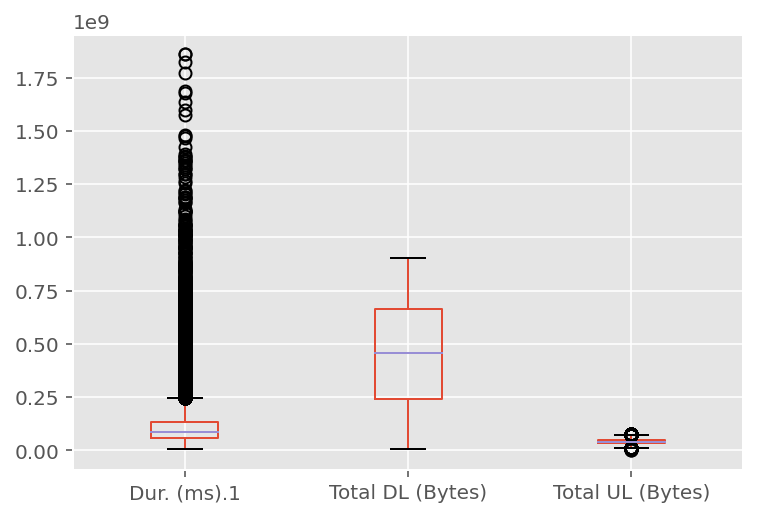

In [113]:
#looking for the outliers
data.boxplot(column=['Dur. (ms).1', "Total DL (Bytes)","Total UL (Bytes)"])


plotting variable distributions

Text(0.5, 1.0, 'Duration Histogram')

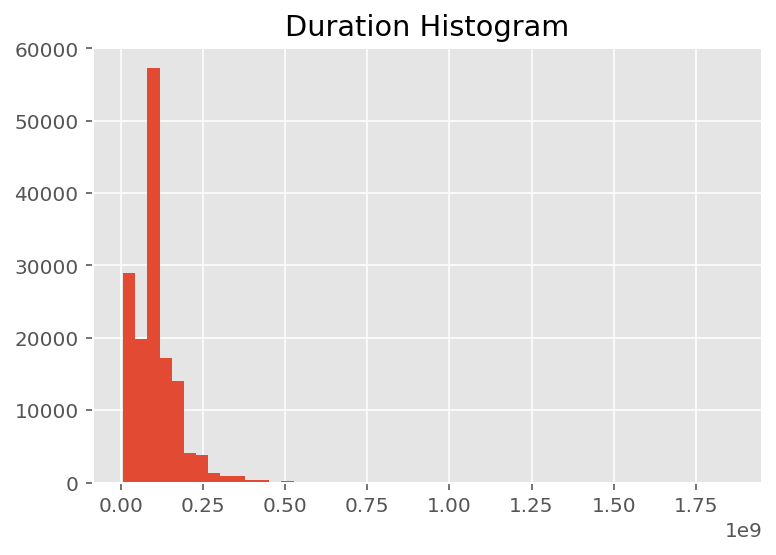

In [124]:
#plotting Histogram for Duration
data["Dur. (ms).1"].hist(bins = 50)
plt.title("Duration Histogram")

Text(0.5, 1.0, 'Total Download Histogram')

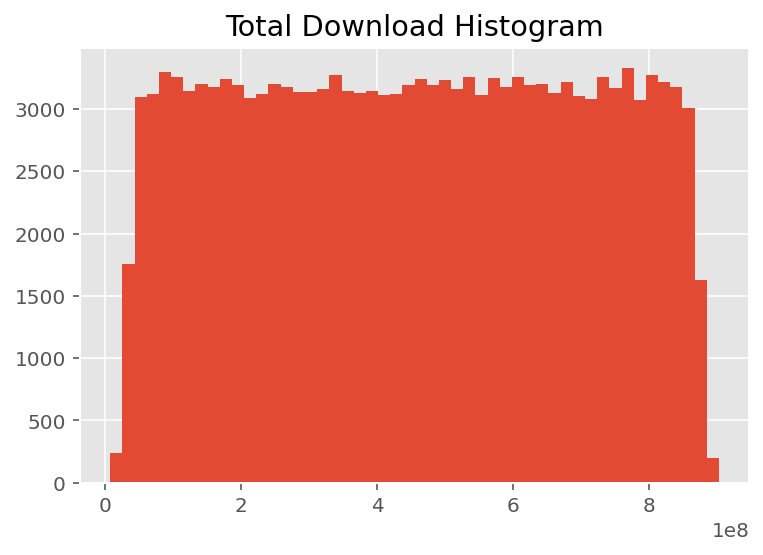

In [117]:
#plotting Histogram for Total Download 

data["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")

Text(0.5, 1.0, 'Total Upload Histogram')

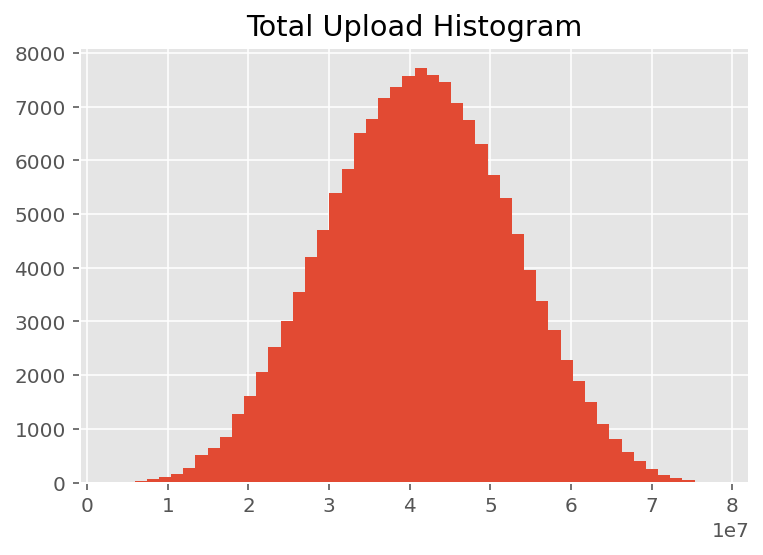

In [118]:
#plotting Histogram for Total Upload 
data["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")

Text(0.5, 1.0, 'Total Social Media Data Histogram')

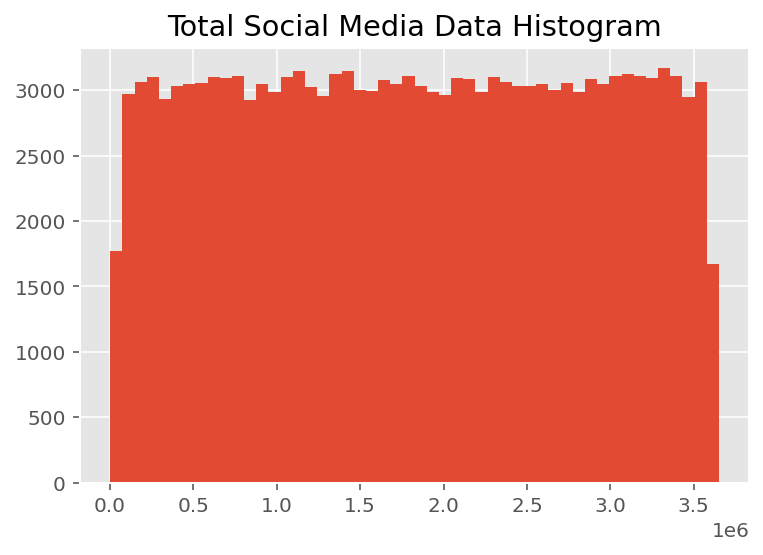

In [119]:
#plotting Histogram for Total Social Media Data
data["Total Social Media"].hist(bins = 50)
plt.title("Total Social Media Data Histogram")

Text(0.5, 1.0, 'Total Google Data Histogram')

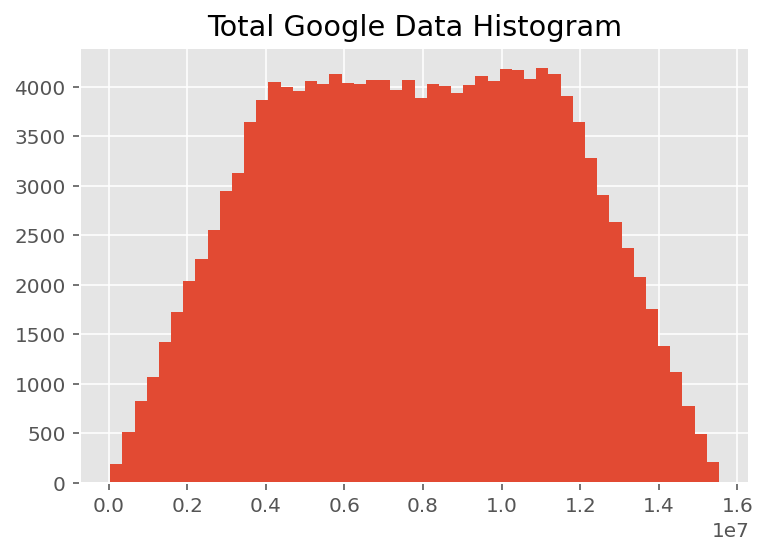

In [120]:
# plotting Histogram for Total Google Data
data["Total Google"].hist(bins = 50)
plt.title("Total Google Data Histogram")

Text(0.5, 1.0, 'Total Email Data Histogram')

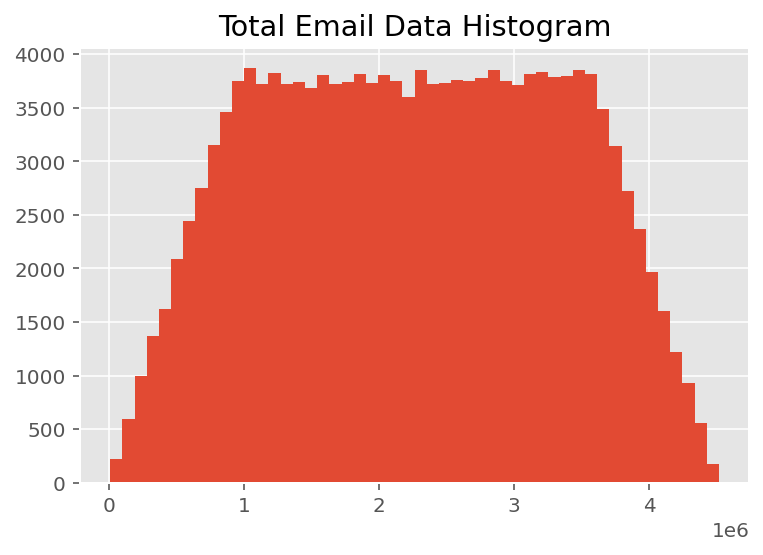

In [121]:
#plotting Histogram  for Total Email Data
data["Total Email"].hist(bins = 50)
plt.title("Total Email Data Histogram")

Text(0.5, 1.0, 'Total Youtube Data Histogram')

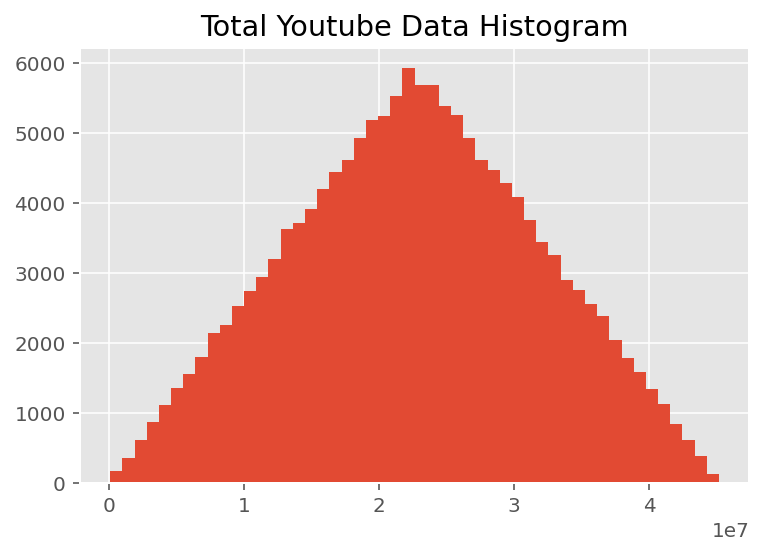

In [122]:
#plotting Histogram for Total Youtube Data 
data["Total Youtube"].hist(bins = 50)
plt.title("Total Youtube Data Histogram")

Text(0.5, 1.0, 'Total Netflix Data Histogram')

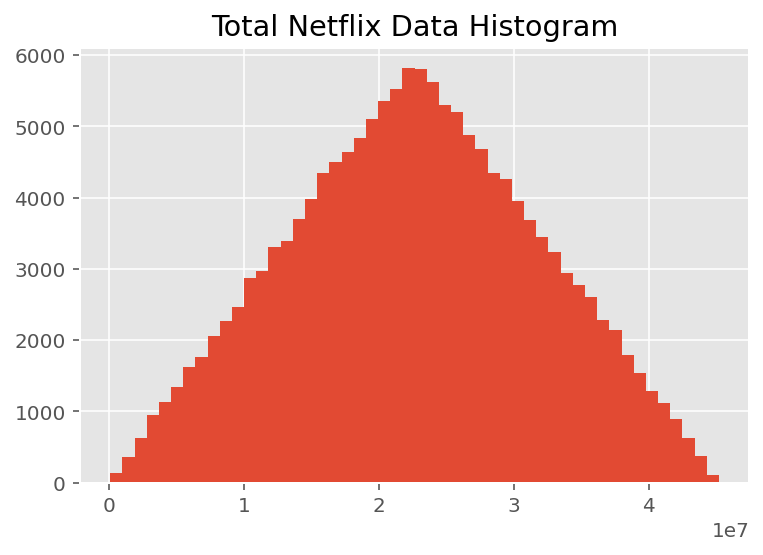

In [123]:
#plotting Histogram for Total Netflix
data["Total Netflix"].hist(bins = 50)
plt.title("Total Netflix Data Histogram")

Text(0.5, 1.0, 'Total Gaming Data Histogram')

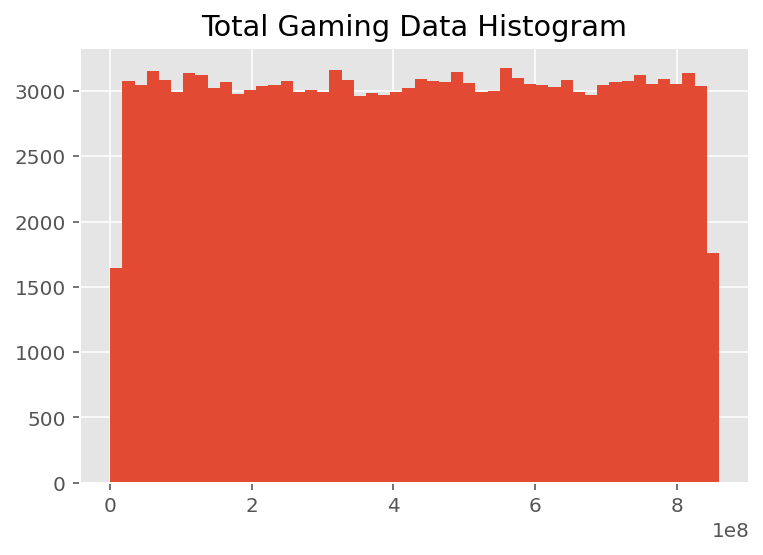

In [125]:
#plotting Histogram for Total Gaming Data
data["Total Gaming"].hist(bins = 50)
plt.title("Total Gaming Data Histogram")

Text(0.5, 1.0, 'App Data usage')

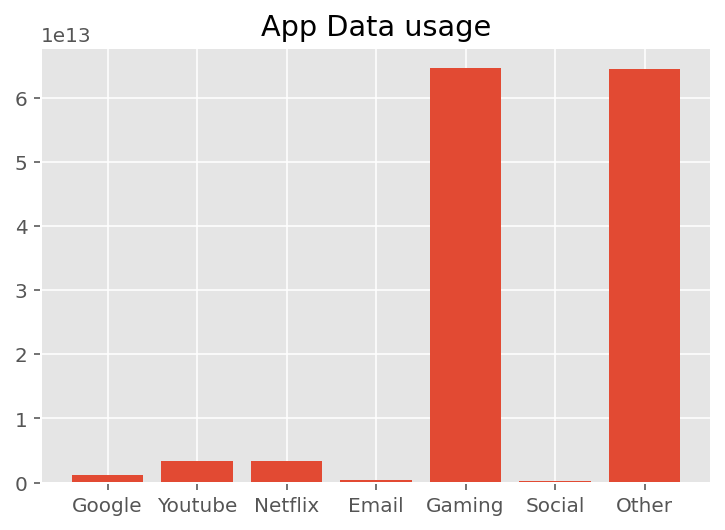

In [126]:
#plotting comparisons
total_usage = app_data[["Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", "Total Social Media", "Total Other"]]
ind = np.arange(7)
width =0.8

plt.xticks(ind , ("Google", "Youtube", "Netflix", "Email", "Gaming", "Social", "Other"))
plt.bar(ind, total_usage.sum(), width, label = "Total Usage")
plt.title("App Data usage")